In [42]:
# Importing utility functions
import pandas as pd
import numpy as np
import os
import sys

# Importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, classification_report

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Importing modeling tools
from sklearn import metrics

# Importing sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# %load_ext autoreload
# %autoreload 2

module_path = os.path.abspath(os.path.join(os.pardir,'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from nb_modules import model as mod

In [2]:
X_train = pd.read_pickle('../data/pickles/X_train_scaled.pkl')
X_test = pd.read_pickle('../data/pickles/X_test_scaled.pkl')
y_train = pd.read_pickle('../data/pickles/y_train_resampled.pkl')
y_test = pd.read_pickle('../data/pickles/y_test.pkl')

In [11]:
rfc = RandomForestClassifier(random_state = 100, n_estimators=1000, max_depth=10, verbose=1, n_jobs=-1)

In [12]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=100, verbose=1)

In [13]:
#use the fitted model to predict on the test data
y_pred_test= rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

# checking f1 score
print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4))
print('Train F1 score: ', round(metrics.f1_score(y_train, y_pred_train, average='weighted'),4))
print('================================')
# checking recall score
print('Test Recall score: ', round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4))
print('Train Recall score: ', round(metrics.recall_score(y_train, y_pred_train, average='weighted'),4))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   10.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   13.1s finished


Test F1 score:  0.6792
Train F1 score:  0.5714
Test Recall score:  0.7017
Train Recall score:  0.6042


In [14]:
mod_eval= {}
mod_eval['rfc0']={'f1':round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4),
                  'recall': round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4)}
mod_eval

{'rfc': {'f1': 0.6792, 'recall': 0.7017}}

In [15]:
rfc1 = RandomForestClassifier(random_state = 100, n_estimators=1000, max_depth=20, verbose=1, n_jobs=-1)

In [16]:
rfc1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.1min finished


RandomForestClassifier(max_depth=20, n_estimators=1000, n_jobs=-1,
                       random_state=100, verbose=1)

In [17]:
#use the fitted model to predict on the test data
y_pred_test= rfc1.predict(X_test)
y_pred_train = rfc1.predict(X_train)

# checking f1 score
print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4))
print('Train F1 score: ', round(metrics.f1_score(y_train, y_pred_train, average='weighted'),4))
print('================================')
# checking recall score
print('Test Recall score: ', round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4))
print('Train Recall score: ', round(metrics.recall_score(y_train, y_pred_train, average='weighted'),4))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   10.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   19.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   25.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   28.1s finished


Test F1 score:  0.7262
Train F1 score:  0.7603
Test Recall score:  0.7239
Train Recall score:  0.7628


In [18]:
mod_eval['rfc1']={'f1':round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4),
                  'recall': round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4)}
mod_eval

{'rfc': {'f1': 0.6792, 'recall': 0.7017},
 'rfc1': {'f1': 0.7262, 'recall': 0.7239}}

In [27]:
#create a dictionary of all the parameters you want to tune
parameters = { 
    'n_estimators': [500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(15,20)),
    'max_leaf_nodes': list(range(0,3))   
}
scoring = {'recall': mod.scorer_recall()}

In [28]:
rfc1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [30]:
# instantiating estimator
rfc2 = RandomForestClassifier(random_state=100)

# Instantiating GridSearch
grid_tree = GridSearchCV(rfc2, parameters, scoring=scoring, cv=10, verbose=2, refit='recall', n_jobs=-1 )

#fit gridsearch to data
grid_tree.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 82.7min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 16, 17, 18, 19],
                         'max_leaf_nodes': [0, 1, 2],
                         'n_estimators': [500, 1000]},
             refit='recall',
             scoring={'recall': make_scorer(recall_score_class)}, verbose=2)

In [31]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print('best_score', grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print('best_param',grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print('best_estimator', grid_tree.best_estimator_)

best_score 0.9714870257031023
best_param {'criterion': 'gini', 'max_depth': 15, 'max_leaf_nodes': 2, 'n_estimators': 500}
best_estimator RandomForestClassifier(max_depth=15, max_leaf_nodes=2, n_estimators=500,
                       random_state=100)


In [32]:
y_pred_test= grid_tree.best_estimator_.predict(X_test)
y_pred_train = grid_tree.best_estimator_.predict(X_train)

# checking f1 score
print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4))
print('Train F1 score: ', round(metrics.f1_score(y_train, y_pred_train, average='weighted'),4))
print('================================')
# checking recall score
print('Test Recall score: ', round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4))
print('Train Recall score: ', round(metrics.recall_score(y_train, y_pred_train, average='weighted'),4))

Test F1 score:  0.6116
Train F1 score:  0.4315
Test Recall score:  0.6916
Train Recall score:  0.5311


In [33]:
mod_eval['rfc2']={'f1':round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4),
                  'recall': round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4)}
mod_eval

{'rfc': {'f1': 0.6792, 'recall': 0.7017},
 'rfc1': {'f1': 0.7262, 'recall': 0.7239},
 'rfc2': {'f1': 0.6116, 'recall': 0.6916}}

In [34]:
rfc3 = RandomForestClassifier(random_state = 100, n_estimators=1000, max_depth=22, verbose=1, n_jobs=-1)

rfc3.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  4.4min finished


RandomForestClassifier(max_depth=22, n_estimators=1000, n_jobs=-1,
                       random_state=100, verbose=1)

In [35]:
#use the fitted model to predict on the test data
y_pred_test= rfc1.predict(X_test)
y_pred_train = rfc1.predict(X_train)

# checking f1 score
print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4))
print('Train F1 score: ', round(metrics.f1_score(y_train, y_pred_train, average='weighted'),4))
print('================================')
# checking recall score
print('Test Recall score: ', round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4))
print('Train Recall score: ', round(metrics.recall_score(y_train, y_pred_train, average='weighted'),4))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   23.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   29.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   22.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   28.3s finished


Test F1 score:  0.7262
Train F1 score:  0.7603
Test Recall score:  0.7239
Train Recall score:  0.7628


In [36]:
mod_eval['rfc3']={'f1':round(metrics.f1_score(y_test, y_pred_test, average='weighted'),4),
                  'recall': round(metrics.recall_score(y_test, y_pred_test, average='weighted'),4)}
mod_eval

{'rfc': {'f1': 0.6792, 'recall': 0.7017},
 'rfc1': {'f1': 0.7262, 'recall': 0.7239},
 'rfc2': {'f1': 0.6116, 'recall': 0.6916},
 'rfc3': {'f1': 0.7262, 'recall': 0.7239}}

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   12.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   29.4s finished


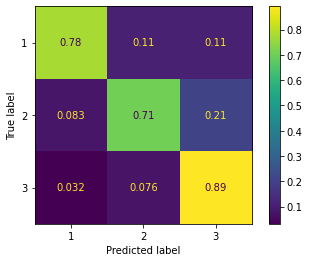

In [38]:
plot_confusion_matrix(rfc3, X_train, y_train, normalize='true')
plt.grid(False)

In [60]:
rfc3.feature_importances_[:15]*100

array([2.27014599, 7.66133057, 6.6201685 , 5.18202407, 0.55256013,
       6.97075846, 0.74017872, 0.31564454, 0.40833741, 2.34872928,
       1.40755479, 0.91413377, 0.64071904, 0.30869292, 0.23354319])

Text(0.5, 1.0, 'Top 15 Important Features')

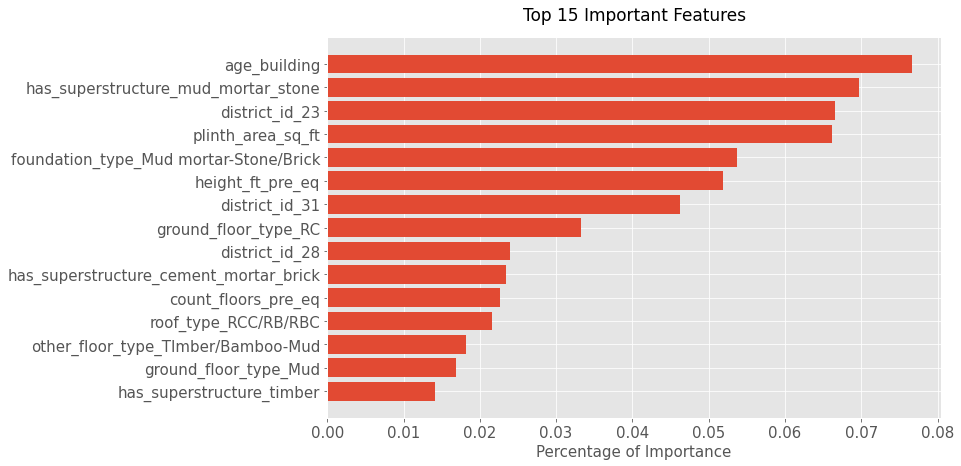

In [57]:
import matplotlib.ticker as ticker
feat_imp = pd.DataFrame({'importance':rfc3.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[0:15]
    
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)

# Sets up figure , axes and draws bar plot
fig, ax = plt.subplots(figsize=(11,7))
ax.barh(feat_imp.index, feat_imp['importance'])

# Formats axis ticks as percentages
ax.tick_params(axis='both', labelsize=15);

# Set axes labels and title
ax.set_xlabel('Percentage of Importance', size = 15)
ax.set_title('Top 15 Important Features', size= 17, pad=17)


In [41]:
rfc3.score

<bound method ClassifierMixin.score of RandomForestClassifier(max_depth=22, n_estimators=1000, n_jobs=-1,
                       random_state=100, verbose=1)>